In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime as dt
import yfinance as yf

In [2]:
# download data
stocks = ['^NSEI']

ohlc_mon = {}
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()
for ticker in stocks:
    ohlc_mon[ticker] = yf.download(ticker, start=start, end= end, interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# ohlc_mon

In [4]:
# CAGR 
def CAGR(DF):
    df = DF.copy()
    n  = len(df)/12
    df['cum_return'] = (1+ df['mon_ret']).cumprod()
    return (df['cum_return'].tolist()[-1])**(1/n) -1

def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [7]:
DF = pd.DataFrame()

DF['mon_ret'] = mon_data['^NSEI']['Close'].pct_change()
# DF["cum_ret"] = (1 + DF["mon_ret"]).cumprod()
CAGR(DF)*100, max_dd(DF)*100

(11.836333952728161, 29.343919217321496)

In [6]:
mon_data = copy.deepcopy(ohlc_mon)

In [8]:
nifty50 = ['BAJAJ-AUTO.NS',
'COALINDIA.NS',
'BHARTIARTL.NS',
'TATAMOTORS.NS',
'SUNPHARMA.NS',
'ICICIBANK.NS',
'BAJAJFINSV.NS',
'M&M.NS',
'HEROMOTOCO.NS',
'BPCL.NS',
'JSWSTEEL.NS',
'POWERGRID.NS',
'HINDUNILVR.NS',
'ULTRACEMCO.NS',
'INDUSINDBK.NS',
'ADANIPORTS.NS',
'ITC.NS',
'APOLLOHOSP.NS',
'HDFCLIFE.NS',
'TATASTEEL.NS',
'NTPC.NS',
'RELIANCE.NS',
'MARUTI.NS',
'HINDALCO.NS',
'KOTAKBANK.NS',
'BAJFINANCE.NS',
'SBILIFE.NS',
'AXISBANK.NS',
'TECHM.NS',
'LT.NS',
'HDFCBANK.NS',
'DRREDDY.NS',
'NESTLEIND.NS',
'GRASIM.NS',
'SHRIRAMFIN.NS',
'SBIN.NS',
'CIPLA.NS',
'ADANIENT.NS',
'TCS.NS',
'EICHERMOT.NS',
'INFY.NS',
'HCLTECH.NS',
'TATACONSUM.NS',
'BRITANNIA.NS',
'DIVISLAB.NS',
'TITAN.NS',
'ASIANPAINT.NS',
'ONGC.NS',
'WIPRO.NS',
'LTIM.NS']

In [9]:
# download data
ohlc_mon_nifty50 = {}
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()
for ticker in nifty50:
    ohlc_mon_nifty50[ticker] = yf.download(ticker, start=start, end= end, interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [10]:
tickers = ohlc_mon_nifty50.keys()

In [11]:
# Backtesting

# calculating monthly return of each stock and consolidating returns in separate data frame

ohlc_dict = copy.deepcopy(ohlc_mon_nifty50)
return_df = pd.DataFrame()

In [12]:
for ticker in tickers:
    ohlc_dict[ticker]['mon_ret'] = ohlc_dict[ticker]['Close'].pct_change() 
    return_df[ticker] = ohlc_dict[ticker]['mon_ret']

return_df.dropna(inplace = True)

In [13]:
# ohlc_dict
return_df

,BAJAJ-AUTO.NS,COALINDIA.NS,BHARTIARTL.NS,TATAMOTORS.NS,SUNPHARMA.NS,ICICIBANK.NS,BAJAJFINSV.NS,M&M.NS,HEROMOTOCO.NS,BPCL.NS,...,INFY.NS,HCLTECH.NS,TATACONSUM.NS,BRITANNIA.NS,DIVISLAB.NS,TITAN.NS,ASIANPAINT.NS,ONGC.NS,WIPRO.NS,LTIM.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.001065,0.139190,-0.169546,-0.074910,0.015320,0.124045,-0.079927,0.015910,-0.024755,-0.049063,...,0.103834,0.107861,-0.081384,-0.005330,-0.053671,0.013284,-0.026068,0.042264,-0.030390,0.137552
2018-02-01,-0.094856,0.032048,-0.025691,-0.074093,-0.076824,-0.112481,0.049737,-0.045475,-0.025667,-0.127463,...,0.019431,-0.046881,-0.052125,0.066202,-0.012988,-0.061411,-0.009350,-0.074465,-0.039055,0.131487
2018-03-01,-0.091340,-0.083616,-0.069653,-0.116383,-0.075184,-0.111413,0.023725,0.014485,-0.014986,-0.004889,...,-0.034794,0.030097,-0.060799,-0.004735,0.062677,0.154567,0.002371,-0.055762,-0.039788,-0.069023
2018-04-01,0.075746,0.006001,0.027213,0.041456,0.067259,0.021017,0.060146,0.181892,0.053475,-0.093812,...,0.059816,0.086878,0.149952,0.109162,0.098422,0.041919,0.072563,0.015467,-0.008536,0.170247
2018-05-01,-0.068516,0.039474,-0.087779,-0.170094,-0.090935,0.005630,0.102077,0.056853,-0.050198,0.042855,...,0.026928,-0.135265,-0.095278,0.074503,-0.125303,-0.083215,0.085670,-0.014677,-0.060448,0.109468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,-0.026727,0.046533,0.076266,0.015210,-0.073093,0.052227,-0.017550,0.122310,-0.037958,0.008217,...,-0.051734,-0.114638,0.011084,-0.027549,0.161699,-0.055908,0.010240,0.055214,-0.036867,-0.046979
2024-05-01,0.020340,0.081224,0.038153,-0.084235,-0.028161,-0.025513,-0.053498,0.162265,0.126908,0.033671,...,-0.009609,-0.031099,-0.043398,0.084559,0.076154,-0.096775,0.001843,-0.065406,-0.052336,-0.000956
2024-06-01,0.045890,-0.036747,0.051940,0.072319,0.041821,0.070068,0.038957,0.143800,0.089851,-0.031698,...,0.113619,0.102334,0.035086,0.057097,0.067155,0.050063,0.012443,0.037261,0.174920,0.145292


In [24]:
# function to calculate iterative return 

def pflio(DF, m, x):
    df = DF.copy()
    portfolio = ['BAJAJ-AUTO.NS','COALINDIA.NS','BHARTIARTL.NS','TATAMOTORS.NS','SUNPHARMA.NS','ICICIBANK.NS']
    monthly_ret = [0]
    for i in range(len(df)):
        if len(portfolio)>0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending = True)[:x].index.values.tolist()
            portfolio = [ t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending= False)[:fill].index.values.tolist()
        portfolio = new_picks +  portfolio
        print(portfolio)
        print('----')
        monthly_ret_df = pd.DataFrame(np.array(monthly_ret), columns=['mon_ret'])
    return monthly_ret_df

In [29]:
CAGR(pflio(return_df, 7, 2))

['ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'BAJAJ-AUTO.NS', 'COALINDIA.NS', 'SUNPHARMA.NS', 'ICICIBANK.NS']
----
['LTIM.NS', 'HDFCLIFE.NS', 'ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'COALINDIA.NS', 'SUNPHARMA.NS']
----
['TITAN.NS', 'SHRIRAMFIN.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'TECHM.NS', 'TCS.NS', 'SUNPHARMA.NS']
----
['TCS.NS', 'M&M.NS', 'SHRIRAMFIN.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'TCS.NS', 'SUNPHARMA.NS']
----
['LTIM.NS', 'BAJFINANCE.NS', 'TCS.NS', 'M&M.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'TCS.NS']
----
['CIPLA.NS', 'SUNPHARMA.NS', 'DRREDDY.NS', 'BAJFINANCE.NS', 'TCS.NS', 'M&M.NS', 'TCS.NS']
----
['ADANIENT.NS', 'RELIANCE.NS', 'CIPLA.NS', 'BAJFINANCE.NS', 'TCS.NS', 'M&M.NS', 'TCS.NS']
----
['APOLLOHOSP.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'RELIANCE.NS', 'BAJFINANCE.NS', 'TCS.NS', 'TCS.NS']
----
['WIPRO.NS', 'LTIM.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'RELIANCE.NS', 'TCS.NS', 'TCS.NS']
----
['ADANIENT.NS', 'ICICIBANK.NS', 'DIVISLAB.NS', 'WIPRO.NS', 'LTIM.NS', 'JSWSTEEL.NS', 'ADANIENT.NS']
----
['BPCL.NS', '

0.20807322408947915

['ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'COALINDIA.NS', 'LTIM.NS', 'LT.NS', 'ICICIBANK.NS', 'COALINDIA.NS', 'SUNPHARMA.NS', 'ICICIBANK.NS']
----
['LTIM.NS', 'HDFCLIFE.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'TECHM.NS', 'TCS.NS', 'COALINDIA.NS', 'LTIM.NS', 'LT.NS', 'COALINDIA.NS']
----
['TITAN.NS', 'SHRIRAMFIN.NS', 'BAJFINANCE.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'JSWSTEEL.NS', 'TECHM.NS', 'TCS.NS', 'LTIM.NS', 'LT.NS']
----
['TCS.NS', 'M&M.NS', 'LTIM.NS', 'SHRIRAMFIN.NS', 'BAJFINANCE.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'JSWSTEEL.NS', 'TCS.NS', 'LTIM.NS']
----
['LTIM.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'KOTAKBANK.NS', 'M&M.NS', 'LTIM.NS', 'BAJFINANCE.NS', 'LTIM.NS', 'JSWSTEEL.NS', 'LTIM.NS']
----
['CIPLA.NS', 'SUNPHARMA.NS', 'DRREDDY.NS', 'APOLLOHOSP.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'KOTAKBANK.NS', 'M&M.NS', 'BAJFINANCE.NS', 'JSWSTEEL.NS']
----
['ADANIENT.NS', 'RELIANCE.NS', 'BAJAJFINSV.NS', 'CIPLA.NS', 'SUNPHARMA.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'M&M.NS', 'BAJFINANCE.NS', 'JSWSTEEL.NS']
--

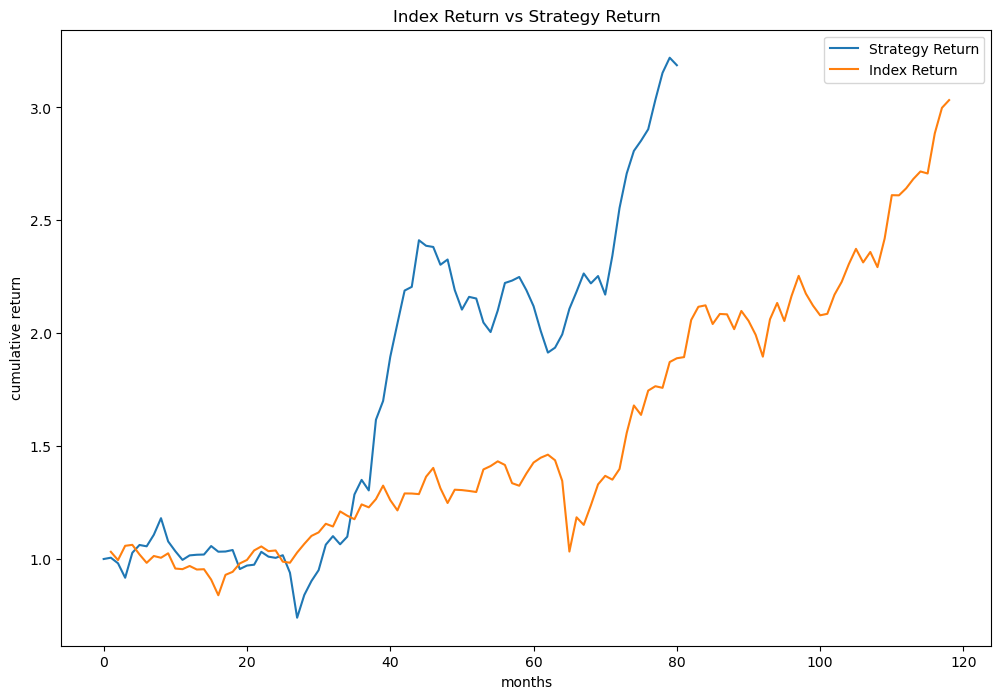

In [30]:
#visualization
fig, ax = plt.subplots(figsize = (12,8))
plt.plot((1+pflio(return_df,10,3)).cumprod())
plt.plot((1+DF['mon_ret'].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"]);